In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('unzipped_lung_cancer/survey_lung_cancer.csv')

print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0    MALE   69        0               1        1              0   
1    MALE   74        1               0        0              0   
2  FEMALE   59        0               0        0              1   
3    MALE   63        1               1        1              0   
4  FEMALE   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0        

In [10]:
print(data.info())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [11]:
for col in data.columns:
    data[col] = data[col].astype('category').cat.codes

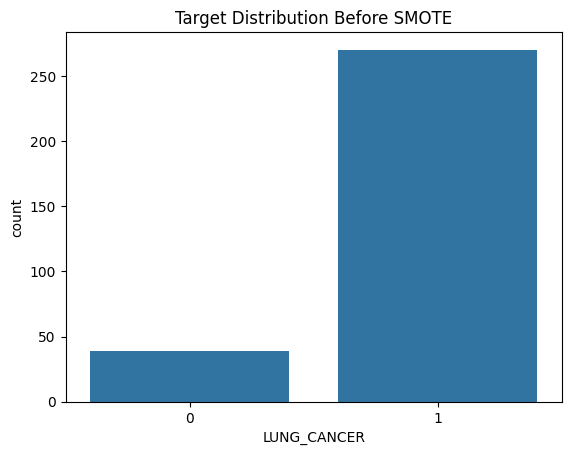

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


In [12]:
sns.countplot(x="LUNG_CANCER", data=data)
plt.title("Target Distribution Before SMOTE")
plt.show()

print(data["LUNG_CANCER"].value_counts())

In [13]:
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

print("Feature Columns:")
print(X.columns)
print("Total Features:", len(X.columns))

Feature Columns:
Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')
Total Features: 15


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

After SMOTE:
LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


In [15]:
X_resampled.to_csv("X_processed.csv", index=False)
pd.DataFrame(y_resampled).to_csv("y_processed.csv", index=False)